In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


In [50]:
df1 = pd.read_csv('train.csv' ,header = 0,index_col=0,squeeze=True)
df1

,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,
1,1,2010-02-05,24924.50,False
1,1,2010-02-12,46039.49,True
1,1,2010-02-19,41595.55,False
1,1,2010-02-26,19403.54,False
1,1,2010-03-05,21827.90,False
...,...,...,...,...
45,98,2012-09-28,508.37,False
45,98,2012-10-05,628.10,False
45,98,2012-10-12,1061.02,False


In [51]:
df2 = pd.read_csv('features.csv' ,header = 0,index_col=0,squeeze=True)
df2 = df2.sort_index()
#df2.isnull().sum()
df2=df2.drop('IsHoliday',axis=1)
df2

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,,,,,,,,,,
1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...
45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN
45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN
45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN


In [52]:
mergeData = pd.merge(df1, df2, on=["Store","Date"],how="left")
mergeData
#mergeData.set_index("Date")

,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
Store,,,,,,,,,,,,,
1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [53]:
import missingno as msno
import matplotlib.pyplot as plt

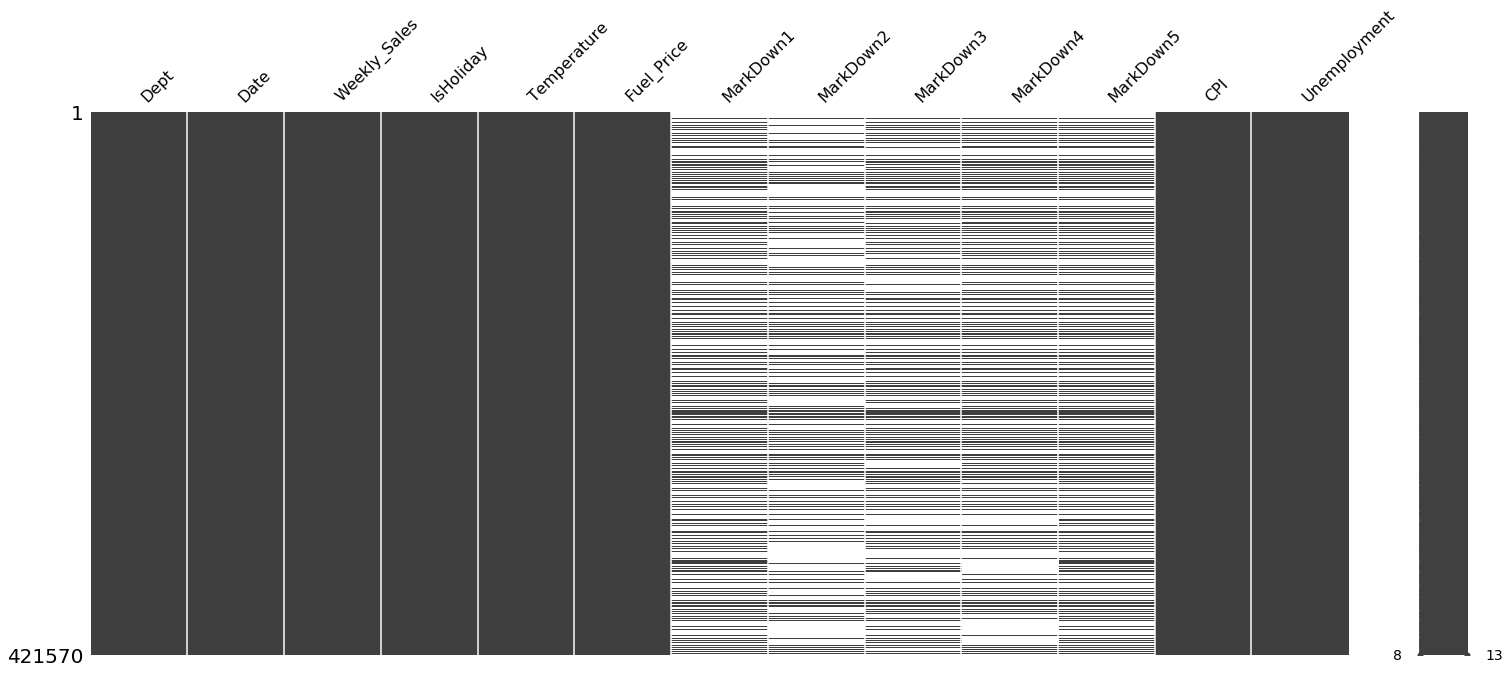

In [54]:
msno.matrix(mergeData)
plt.show()

In [55]:
train=mergeData.drop(columns=['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [56]:
train

,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106
1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106
1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106
1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684
45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667
45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667


In [34]:
#train2=train.set_index('Date')

In [35]:
#train2

,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,
2010-02-05,1,24924.50,False,42.31,2.572,211.096358,8.106,False
2010-02-12,1,46039.49,True,38.51,2.548,211.242170,8.106,True
2010-02-19,1,41595.55,False,39.93,2.514,211.289143,8.106,False
2010-02-26,1,19403.54,False,46.63,2.561,211.319643,8.106,False
2010-03-05,1,21827.90,False,46.50,2.625,211.350143,8.106,False
2010-03-12,1,21043.39,False,57.79,2.667,211.380643,8.106,False
2010-03-19,1,22136.64,False,54.58,2.720,211.215635,8.106,False
2010-03-26,1,26229.21,False,51.45,2.732,211.018042,8.106,False
2010-04-02,1,57258.43,False,62.27,2.719,210.820450,7.808,False


In [57]:
train

,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106
1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106
1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106
1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684
45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667
45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667


In [58]:
#fill_mean_func = lambda g: g.fillna(g.mean())
#train.groupby("Date").apply(fill_mean_func) #CPI,Unemployment NaN인거 Date로 평균내서 채우기
#train.isnull().sum()

In [62]:
#train=train.reset_index('Store')
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667


In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


In [64]:
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [65]:
# 하이퍼파라미터
input_data_column_cnt = 8  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수

seq_length = 28            # 1개 시퀀스의 길이(시계열데이터 입력 개수)
rnn_cell_hidden_dim = 20   # 각 셀의 (hidden)출력 크기
forget_bias = 1.0          # 망각편향(기본값 1.0)
num_stacked_layers = 1     # stacked LSTM layers 개수
keep_prob = 1.0            # dropout할 때 keep할 비율

epoch_num = 2000           # 에폭 횟수(학습용전체데이터를 몇 회 반복해서 학습할 것인가 입력)
learning_rate = 0.01       # 학습률

In [66]:
#train=train.set_index('Date')

In [67]:
train['IsHoliday'] = (train['IsHoliday']==True).astype(int)

In [68]:
train=train[['Store','Dept','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]

In [69]:
train

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Date,,,,,,,,
2010-02-05,1,1,0,42.31,2.572,211.096358,8.106,24924.50
2010-02-12,1,1,1,38.51,2.548,211.242170,8.106,46039.49
2010-02-19,1,1,0,39.93,2.514,211.289143,8.106,41595.55
2010-02-26,1,1,0,46.63,2.561,211.319643,8.106,19403.54
2010-03-05,1,1,0,46.50,2.625,211.350143,8.106,21827.90
...,...,...,...,...,...,...,...,...
2012-09-28,45,98,0,64.88,3.997,192.013558,8.684,508.37
2012-10-05,45,98,0,64.89,3.985,192.170412,8.667,628.10
2012-10-12,45,98,0,54.47,4.000,192.327265,8.667,1061.02


In [253]:
#train['Date']=train['Date'].astype(str)

In [70]:
np_data = train.values[:].astype(np.float) # 부동 소수점 형으로 변환

In [71]:
price = np_data[:,:-1]
price

array([[  1.       ,   1.       ,   0.       , ...,   2.572    ,
        211.0963582,   8.106    ],
       [  1.       ,   1.       ,   1.       , ...,   2.548    ,
        211.2421698,   8.106    ],
       [  1.       ,   1.       ,   0.       , ...,   2.514    ,
        211.2891429,   8.106    ],
       ...,
       [ 45.       ,  98.       ,   0.       , ...,   4.       ,
        192.3272654,   8.667    ],
       [ 45.       ,  98.       ,   0.       , ...,   3.969    ,
        192.3308542,   8.667    ],
       [ 45.       ,  98.       ,   0.       , ...,   3.882    ,
        192.3088989,   8.667    ]])

In [72]:
np_data

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.11096358e+02, 8.10600000e+00, 2.49245000e+04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.11242170e+02, 8.10600000e+00, 4.60394900e+04],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.11289143e+02, 8.10600000e+00, 4.15955500e+04],
       ...,
       [4.50000000e+01, 9.80000000e+01, 0.00000000e+00, ...,
        1.92327265e+02, 8.66700000e+00, 1.06102000e+03],
       [4.50000000e+01, 9.80000000e+01, 0.00000000e+00, ...,
        1.92330854e+02, 8.66700000e+00, 7.60010000e+02],
       [4.50000000e+01, 9.80000000e+01, 0.00000000e+00, ...,
        1.92308899e+02, 8.66700000e+00, 1.07680000e+03]])

In [73]:
price = np_data[:,:-1]
norm_price = min_max_scaling(price) # 가격형태 데이터 정규화 처리
print("price.shape: ", price.shape)
print("price[0]: ", price[0])
print("norm_price[0]: ", norm_price[0])
print("="*100) # 화면상 구분용

price.shape:  (421570, 7)
price[0]:  [  1.          1.          0.         42.31        2.572     211.0963582
   8.106    ]
norm_price[0]:  [0.01334538 0.01334538 0.00898415 0.19350803 0.02020124 0.92962514
 0.04433632]


In [74]:
volume = np_data[:,-1:]
norm_volume = min_max_scaling(volume) # 거래량형태 데이터 정규화 처리
print("volume.shape: ", volume.shape)
print("volume[0]: ", volume[0])
print("norm_volume[0]: ", norm_volume[0])
print("="*100) # 화면상 구분용

volume.shape:  (421570, 1)
volume[0]:  [24924.5]
norm_volume[0]:  [0.04285051]


In [75]:
x = np.concatenate((norm_price, norm_volume), axis=1) # axis=1, 세로로 합친다
print("x.shape: ", x.shape)
print("x[0]: ", x[0])    # x의 첫 값
print("x[-1]: ", x[-1])  # x의 마지막 값
print("="*100) # 화면상 구분용

x.shape:  (421570, 8)
x[0]:  [0.01334538 0.01334538 0.00898415 0.19350803 0.02020124 0.92962514
 0.04433632 0.04285051]
x[-1]:  [0.20523976 0.43638525 0.00898415 0.26564287 0.02591446 0.8476886
 0.04678298 0.00868907]


In [76]:
y = x[:, [-2]] # 타켓은 주식 종가이다
print("y[0]: ",y[0])     # y의 첫 값
print("y[-1]: ",y[-1])   # y의 마지막 값

y[0]:  [0.04433632]
y[-1]:  [0.04678298]


In [77]:
dataX = [] # 입력으로 사용될 Sequence Data
dataY = [] # 출력(타켓)으로 사용

for i in range(0, len(y) - seq_length):
    _x = x[i : i+seq_length]
    _y = y[i + seq_length] # 다음 나타날 주가(정답)
    if i is 0:
        print(_x, "->", _y) # 첫번째 행만 출력해 봄
    dataX.append(_x) # dataX 리스트에 추가
    dataY.append(_y) # dataY 리스트에 추가

[[0.01334538 0.01334538 0.00898415 0.19350803 0.02020124 0.92962514
  0.04433632 0.04285051]
 [0.01334538 0.01334538 0.01334538 0.17693534 0.02009657 0.93026106
  0.04433632 0.07309739]
 [0.01334538 0.01334538 0.00898415 0.18312829 0.01994829 0.93046592
  0.04433632 0.06673152]
 [0.01334538 0.01334538 0.00898415 0.21234857 0.02015327 0.93059894
  0.04433632 0.03494183]
 [0.01334538 0.01334538 0.00898415 0.21178161 0.02043239 0.93073196
  0.04433632 0.03841468]
 [0.01334538 0.01334538 0.00898415 0.26101996 0.02061556 0.93086497
  0.04433632 0.03729088]
 [0.01334538 0.01334538 0.00898415 0.2470204  0.02084671 0.93014534
  0.04433632 0.03885695]
 [0.01334538 0.01334538 0.00898415 0.23336973 0.02089904 0.92928359
  0.04433632 0.04471949]
 [0.01334538 0.01334538 0.00898415 0.2805583  0.02084235 0.92842184
  0.04303667 0.08916833]
 [0.01334538 0.01334538 0.00898415 0.29621514 0.02106477 0.92756009
  0.04303667 0.06868737]
 [0.01334538 0.01334538 0.00898415 0.2982213  0.0212305  0.926975
  0.

In [78]:
# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size

# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

In [86]:
import tensorflow.compat.v1 as tf


tf.enable_eager_execution()
#tf.disable_v2_behavior()

In [89]:
# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)

# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)

predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

RuntimeError: tf.placeholder() is not compatible with eager execution.

In [90]:
# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)

AttributeError: module 'tensorflow_core.compat.v1' has no attribute 'contrib'